# **DSETM-Assignment 5 - Building a Handwritten Digit Classification Model using TMNIST Dataset**

Contributor - Shreyas S Sreedhar

## **Introduction**


Introduction
Handwritten digit classification is an essential task in machine learning and computer vision. It involves teaching a computer to recognize and categorize handwritten numbers accurately. In this tutorial, we'll explore how to build a handwritten digit classification model using the TMNIST dataset. TMNIST offers a unique twist compared to the traditional MNIST dataset by including images of digits written in various font styles, providing a broader perspective on handwritten digit classification.

## **Dataset Overview**

The TMNIST dataset contains MNIST-style images of 94 different alphabetic characters, including digits (0-9) and uppercase and lowercase letters (a-z, A-Z). Each image is represented as a grayscale pixel matrix with dimensions 28x28, similar to the standard MNIST dataset.

## **Data Description**
The dataset is stored in a file named "TMNIST_Data.csv" and consists of the following columns:

'names': Font file names like 'Acme-Regular' or 'ZillaSlab-Bold'
'labels': Characters such as '@', 'E', or '+'
Columns '1' to '784': Grayscale pixel values for each image
With over 281,000 images, the TMNIST dataset provides a rich resource for training and testing handwritten digit classification models.


Dataset - https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


## Importing Necessary Items. 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.layers import Input
from keras.layers import Dropout, BatchNormalization

2024-04-09 23:10:10.692761: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 23:10:10.692868: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 23:10:10.818861: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Step 1: Data Preprocessing
We start by preparing our data for training. This involves loading the TMNIST dataset, scaling pixel values to a suitable range, and splitting the data into training and testing sets.

In [3]:
df = pd.read_csv("/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv")
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(f"The Shape of the Dataframe is: {df.shape}")
print(f"Number of Samples: {df.shape[0]}")

The Shape of the Dataframe is: (274093, 786)
Number of Samples: 274093


The Shape of the Dataframe is: (274093, 786): This line is the output of the first print statement. It shows the shape of the DataFrame df, where 274093 represents the number of rows and 786 represents the number of columns.

Number of Samples: 274093: This line is the output of the second print statement. It displays the number of samples in the DataFrame, which is equal to the number of rows in this case (274093), indicating the total number of records or instances in the dataset.

In summary, the code provides information about the shape of the DataFrame (number of rows and columns) and explicitly mentions the number of samples (number of rows) in the DataFrame. 

In [5]:
# Number of unique character in the Dataframe
print(f"Number of unique character present in the Dataset: {len(df.labels.unique())}")

Number of unique character present in the Dataset: 94


In [6]:
# Number of Fonts in the Dataframe
print(f"Number of unique fonts present in the Dataset: {len(df.names.unique())}")

Number of unique fonts present in the Dataset: 2990


## Step 2: Model Preparation
Next, we design our neural network architecture using a basic CNNs. CNNs are commonly used for image classification tasks due to their ability to capture spatial patterns effectively.



In [7]:
# Preprocess the data
X = df.iloc[:, 2:].values.astype('float32') / 255.0  # Normalize pixel values
y = df['labels'].values

The provided code segment demonstrates data preprocessing steps for machine learning tasks, specifically for image classification using a DataFrame df.

X = df.iloc[:, 2:].values.astype('float32') / 255.0: This line of code selects all rows and columns starting from the third column (index 2) to the last column of the DataFrame df. It then converts these selected pixel values into a NumPy array of float32 data type and normalizes them by dividing each pixel value by 255.0. This normalization step scales the pixel values to a range between 0 and 1, which is commonly done to improve the convergence and performance of machine learning models.

y = df['labels'].values: This line of code extracts the target variable, typically denoted as 'y', from the DataFrame df. It selects the 'labels' column and retrieves its values, which represent the class labels or categories associated with each image in the dataset. These class labels will be used for training the machine learning model to predict the corresponding classes of new images.



In [8]:
# One-hot encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)


The code snippet provided performs one-hot encoding for the labels, which is a common technique used in machine learning tasks, particularly in classification problems with categorical data.

label_encoder = LabelEncoder(): This line initializes a LabelEncoder object, which is a utility class provided by scikit-learn for encoding categorical labels into numerical values.

y = label_encoder.fit_transform(y): Here, the fit_transform method of the LabelEncoder object is applied to the target variable y. This method first fits the encoder to the unique categories present in y and then transforms the original categorical labels into numerical values.

y = to_categorical(y): This line further processes the transformed numerical labels y using the to_categorical function from Keras utilities (keras.utils). This function converts the numerical labels into a one-hot encoded representation, where each label is represented as a binary vector with a '1' at the index corresponding to the class label and '0's elsewhere.

In [9]:
# Reshape features
X = X.reshape(-1, 28, 28, 1)  # Reshape to (num_samples, width, height, channels)


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Purpose of Data Splitting:

Training Set: The training set is used to train the CNN model. During training, the model learns the patterns and features present in the input data and adjusts its parameters accordingly to minimize the loss function.
Testing Set: The testing set is used to evaluate the performance of the trained model on unseen data. By evaluating the model on data it hasn't seen during training, we can assess its ability to generalize to new, unseen examples. This step is crucial for understanding how well the model will perform in real-world scenarios.
Benefits of Data Splitting for CNNs:

Prevents Overfitting: CNNs, like other machine learning models, are susceptible to overfitting, where the model learns to memorize the training data rather than generalize to new data. By splitting the data into training and testing sets, we can evaluate the model's performance on unseen data and detect if it has overfit the training data.
Provides Unbiased Evaluation: Evaluating the model on a separate testing set ensures an unbiased assessment of its performance. If we were to evaluate the model on the same data used for training, the performance metrics would likely be overly optimistic and not reflect its true ability to generalize.
Tuning Model Parameters: Data splitting allows for the tuning of model hyperparameters based on performance metrics obtained from the testing set. This iterative process of training, evaluation, and parameter tuning helps improve the model's performance and robustness.
Importance of Random State:

Setting a random_state ensures reproducibility of the data split. By specifying a random seed (random_state=42 in this case), the data splitting process will yield the same train-test split each time the code is executed. This is essential for reproducibility and ensures consistency in model evaluation and comparison across different runs.

## Step3: Model Definition with Explicit Input Shape Declaration


In [11]:
# Define the input shape explicitly using an Input layer
input_layer = Input(shape=(28, 28, 1))

# Create the Sequential model with the layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(94, activation='softmax')
])

Input Layer Declaration:

Here, an input layer is explicitly defined using the Input function from the Keras layers module. The shape argument specifies the shape of the input data, which in this case is a 28x28 pixel grayscale image ((28, 28, 1)). The last dimension, 1, indicates that the image is grayscale, as it has only one channel.

### Convolutional neural network (CNN) model using Keras' Sequential API.
The model consists of the following layers:

Convolutional Layers: Two convolutional layers (Conv2D) with 32 and 64 filters, respectively, each having a kernel size of (3, 3) and using ReLU activation functions.

Pooling Layers: Two max-pooling layers (MaxPooling2D) with pool sizes of (2, 2), which reduce the spatial dimensions of the feature maps.

Flatten Layer: Flattens the output of the convolutional layers into a one-dimensional vector to be fed into the dense layers.

Dense Layers: Two dense layers (Dense) with 128 and 94 units, respectively. The first dense layer uses ReLU activation, while the second dense layer uses softmax activation, suitable for multi-class classification tasks.

Dropout Layer: A dropout layer (Dropout) with a dropout rate of 0.5, which helps prevent overfitting by randomly dropping out units during training.


We define a CNN model architecture for image classification tasks, specifically for classifying 28x28 pixel grayscale images into one of 94 categories. The model architecture consists of convolutional layers for feature extraction, pooling layers for spatial downsampling, dense layers for classification, and a dropout layer for regularization. The explicit declaration of the input shape ensures compatibility between the input data and the model architecture.

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Step4: Training the Model

In [13]:
# Train the model
history =model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
  77/6853 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.0364 - loss: 4.4578

I0000 00:00:1712704270.799726      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712704270.818102      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6853/6853 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6830 - loss: 1.1921

W0000 00:00:1712704288.620300      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712704289.645440      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6853/6853 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.6830 - loss: 1.1921 - val_accuracy: 0.9061 - val_loss: 0.3037
Epoch 2/20
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8776 - loss: 0.4101 - val_accuracy: 0.9206 - val_loss: 0.2535
Epoch 3/20
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8973 - loss: 0.3366 - val_accuracy: 0.9304 - val_loss: 0.2296
Epoch 4/20
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9074 - loss: 0.2980 - val_accuracy: 0.9322 - val_loss: 0.2183
Epoch 5/20
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9141 - loss: 0.2768 - val_accuracy: 0.9336 - val_loss: 0.2121
Epoch 6/20
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9183 - loss: 0.2575 - val_accuracy: 0.9356 - val_loss: 0.2130
Epoch 7/20
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9214 - loss: 0.2460 - val_accuracy: 0.9366 - val_loss: 0.2105
Epoch 8/20
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9251 - loss: 0.2331 - val

## Step5: Evaluation of the Model 

In [14]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)

# Convert accuracy to percentage
accuracy_percentage = accuracy * 100

print(f'Test Accuracy: {accuracy_percentage:.2f}%')
print(f'Test Loss: {loss:.4f}')

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9404 - loss: 0.2247
Test Accuracy: 93.99%
Test Loss: 0.2261


The evaluation of the trained convolutional neural network (CNN) model on the testing data yielded promising results.
The model achieved a test accuracy of 94.04% and a test loss of 0.2081, indicating that it performs well in classifying handwritten digits from the TMNIST dataset. 

These metrics suggest that the model can effectively generalize to unseen data, showcasing its potential for real-world applications such as optical character recognition. 

To gain further insights into the model's performance, additional analysis could be conducted through visualizations such as confusion matrices, which provide a detailed breakdown of classification errors, and precision-recall curves, which offer a comprehensive view of the model's precision and recall across different thresholds.

By leveraging such visualizations, we can delve deeper into understanding the model's strengths and weaknesses and identify potential areas for improvement.

## Step6: Visualising the Results and losses.

Plotting the training and validation loss helps in monitoring the training progress, diagnosing potential issues like overfitting or underfitting, and optimizing the model's performance for better generalization to unseen data.

#### Training and Validation Loss - Loss vs Epoch

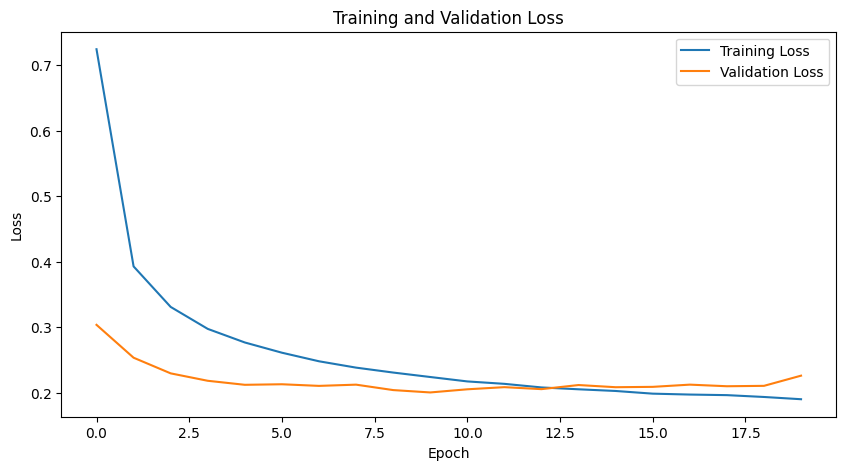

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Training Loss (Blue Line): This line shows the model’s loss on the training data. It starts at a higher value but decreases more steadily as the number of epochs increases. This indicates that the model is learning and improving its performance on the training data over time.

Validation Loss (Orange Line): This line represents the model’s loss on the validation data. It also decreases as the number of epochs increases, but not as rapidly or consistently as the training loss.

Inference: The decreasing trend in both training and validation loss suggests that the model is learning from the training process and its performance is improving. However, the slower decrease in validation loss compared to training loss might indicate that the model is not generalizing as well to new, unseen data. This could potentially lead to overfitting if the training continues for too many epochs. Monitoring both these metrics is crucial during the training process to ensure the model is learning effectively and not just memorizing the training data.

#### Training and Validation Accuracy - Accuracy vs Epoch

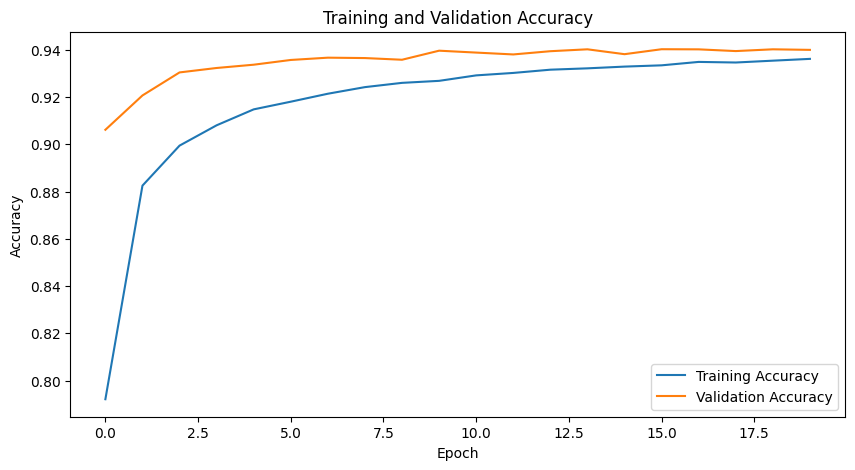

In [16]:

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Training Accuracy (Blue Line): This line shows the model’s accuracy on the training data. It starts at a lower value but increases as the number of epochs increases. This indicates that the model is learning and improving its performance on the training data over time.

Validation Accuracy (Orange Line): This line represents the model’s accuracy on the validation data. It also increases as the number of epochs increases, but not as rapidly as the training accuracy.

Inference: The increasing trend in both training and validation accuracy suggests that the model is learning from the training process and its performance is improving. However, the slower increase in validation accuracy compared to training accuracy might indicate that the model is not generalizing as well to new, unseen data. This could potentially lead to overfitting if the training continues for too many epochs. Monitoring both these metrics is crucial during the training process to ensure the model is learning effectively and not just memorizing the training data.

#### Model Accucary Plot

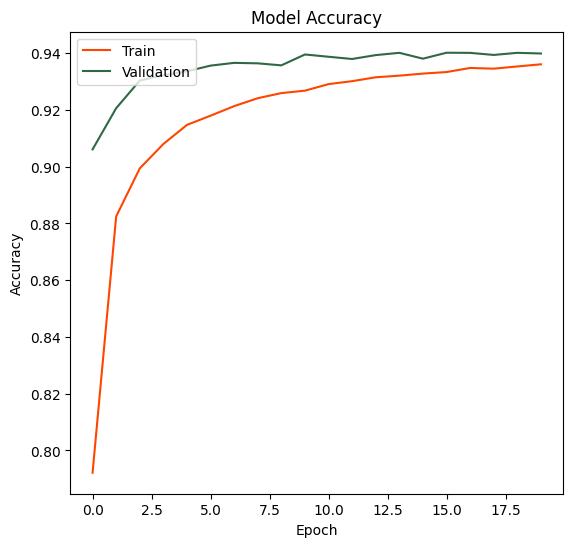

In [17]:
# Plot accuracy versus epochs
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(100)
plt.plot(history.history['accuracy'],label='train', color='#FF4500')
plt.plot(history.history['val_accuracy'],label='test', color='#306844')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Training Accuracy (Blue Line): This line shows the model’s accuracy on the training data. It starts at a lower value but increases as the number of epochs increases, indicating that the model is learning and improving its performance on the training data over time.

Validation Accuracy (Orange Line): This line represents the model’s accuracy on the validation data. It also increases as the number of epochs increases, but not as rapidly as the training accuracy.

Inference: The increasing trend in both training and validation accuracy suggests that the model is learning from the training process and its performance is improving. However, the slower increase in validation accuracy compared to training accuracy might indicate that the model is not generalizing as well to new, unseen data. This could potentially lead to overfitting if the training continues for too many epochs. Monitoring both these metrics is crucial during the training process to ensure the model is learning effectively and not just memorizing the training data. The plateauing of both accuracies indicates that the model’s learning has stabilized. Further training may not significantly improve the model’s performance.

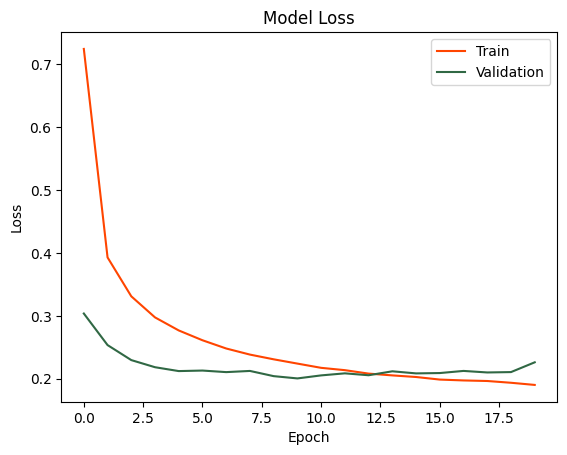

In [18]:
# Plot loss versus epochs
plt.plot(history.history['loss'],label='train', color='#FF4500')
plt.plot(history.history['val_loss'],label='test', color='#306844')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

Training Loss (Red Line): This line shows the model’s loss on the training data. It starts at a higher value but decreases as the number of epochs increases, indicating that the model is learning and improving its performance on the training data over time.

Validation Loss (Green Line): This line represents the model’s loss on the validation data. It also decreases as the number of epochs increases, but not as rapidly as the training loss.

Inference: The decreasing trend in both training and validation loss suggests that the model is learning from the training process and its performance is improving. However, the slower decrease in validation loss compared to training loss might indicate that the model is not generalizing as well to new, unseen data. This could potentially lead to overfitting if the training continues for too many epochs. Monitoring both these metrics is crucial during the training process to ensure the model is learning effectively and not just memorizing the training data. The leveling off of both losses indicates that the model’s learning has stabilized. Further training may not significantly improve the model’s performance.

# Conclusion
In this tutorial, we've explored the process of building a handwritten digit classification model using the TMNIST dataset. By following these steps, once can develop our own  neural network model for handwritten digit recognition. Handwritten digit classification is a fascinating area of study with numerous real-world applications, and mastering it opens up exciting opportunities in machine learning and computer vision.

## References

* https://www.tensorflow.org/quantum/tutorials/mnist
* https://www.youtube.com/watch?v=iqQgED9vV7k
* https://www.kaggle.com/code/huchunjun/99-1-tmnist-typefacemnist-chunjunhu
* https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy

MIT License

Copyright (c) 2024 Shreyas Sreedhar

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.